### Problem 3: Brownian motion with drift

In [1]:
import matplotlib.pyplot as plt
import numpy as np


from scipy.optimize import curve_fit

plt.rc('font', size=10)          # controls default text sizes
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels

In [2]:
# function calculating the MSD
def calculate_msd(X, t):
    dX = X - X[0,:]
    msd = np.mean(dX**2, axis=1)

    return msd

In [3]:
# function solving the Langevin equation and plotting
def Drift_Noise(ax1,nruns,sigma,times,dt):
    X = np.empty([times.size,nruns])
    for runs in range(nruns):
        x = np.vstack(np.random.randn(1)) # initial condition
        for t in range(len(times)-1):
            xnew = x[-1] + sigma*np.random.normal(loc=0.0,scale=np.sqrt(dt)) + drift_velocity *dt
            x = np.append(x, xnew)
        
        ax1.plot(times, x, linewidth = 2)

        X[:,runs] = x
        
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Position x')

    return X

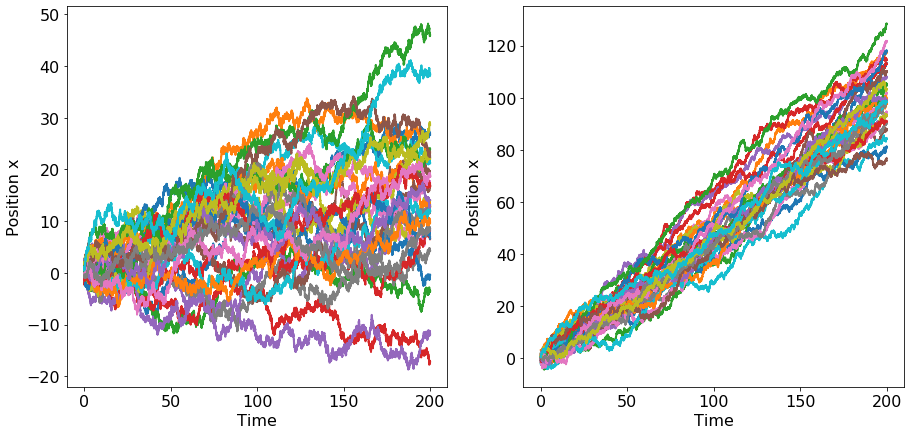

In [5]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(15,7))

# Parameters:
total_time = 200 #Total time of trajectories
N = 30 # Number of trajectories
dt = 0.01 # time discretization
sigma = 1 #noise strength

times = np.arange(0,total_time,dt)

# ------------------
# Compare trajevtories for different drift
# ------------------
drift_velocity = 0.1
X = Drift_Noise(ax1,N, sigma, times,dt)
# ------------------
drift_velocity = 0.5
X = Drift_Noise(ax2,N, sigma, times,dt)
# ------------------

plt.savefig("sheet7_Prob2a.pdf")

## Calculate MSD and plot (log-log) and fit a linear function to MSD

In [7]:
# The linear function to fit to MSD
def func(x,a,b):
    return a*x + b

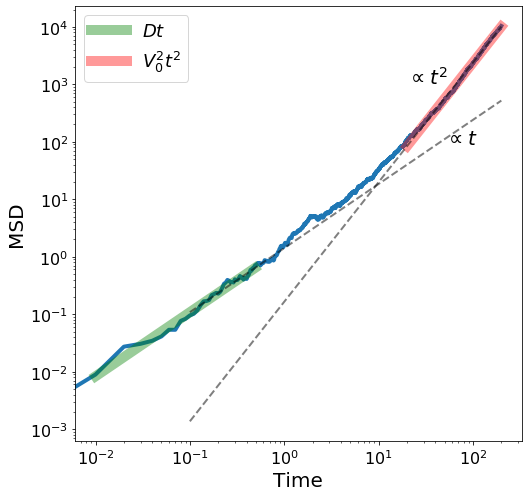

In [9]:
fig, ax = plt.subplots(figsize=(8,8))
plt.plot(times, msd, linewidth=4)

x = np.log(times[10:20000])

#Call function to calculate MSD:
msd = calculate_msd(X, times)

# -----------------

#Fit line to the short time part of MSD plot
x_b = np.log(times[1:50])
y_b = np.log(msd[1:50])

popt, pcov = curve_fit(func, x_b, y_b)
alpha_b = popt[0]
b_b = popt[1]
plt.plot(np.exp(x_b), np.exp(alpha_b*x_b+b_b), 'g', linewidth=10, alpha=0.4, label = '$Dt$')
plt.plot(np.exp(x), np.exp(alpha_b*x+b_b), 'k--', linewidth = 2, alpha=0.5)


# -----------------
#Fit line to the short time part of MSD plot
x_e = np.log(times[2000:20000])
y_e = np.log(msd[2000:20000])

popt, pcov = curve_fit(func, x_e, y_e)
alpha_e = popt[0]
b_e = popt[1]
plt.plot(np.exp(x_e), np.exp(alpha_e*x_e+b_e), 'r', linewidth = 10, alpha=0.4, label='$V_0^2t^2$')
plt.plot(np.exp(x), np.exp(alpha_e*x+b_e), 'k--', linewidth = 2, alpha=0.5)

# -----------------

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Time', fontsize=20)
plt.ylabel('MSD', fontsize=20)

ax.legend(fontsize=18, loc='best')
plt.text(50,90,'$\propto t$', fontsize=20)
plt.text(20,1000,'$\propto t^2$', fontsize=20)

plt.savefig('msd_drift_fit.pdf')
